<a href="https://colab.research.google.com/github/anubhavgupta1/Udacity/blob/main/Perceptron/Iris/IrisDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Classification of Iris Dataset as setosa and non - setosa species

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.model_selection import  train_test_split

##Load the Data

In [2]:
iris = load_iris()
data = pd.DataFrame(iris.data, columns = iris.feature_names)
data["class"] = iris.target
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
type(data)

pandas.core.frame.DataFrame

In [5]:
data = data[data.columns.difference(['sepal length (cm)','sepal width (cm)'])]

In [6]:
data["class"] = (data["class"]==0) * 1

In [7]:
data.describe()

,class,petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000
mean,0.333333,3.758000,1.199333
std,0.472984,1.765298,0.762238
min,0.000000,1.000000,0.100000
25%,0.000000,1.600000,0.300000
50%,0.000000,4.350000,1.300000
75%,1.000000,5.100000,1.800000
max,1.000000,6.900000,2.500000


In [8]:
data["class"].value_counts()

0    100
1     50
Name: class, dtype: int64

In [9]:
data.groupby('class').mean()

,petal length (cm),petal width (cm)
class,,
0,4.906,1.676
1,1.462,0.246


In [10]:
data.head()

,class,petal length (cm),petal width (cm)
0,1,1.4,0.2
1,1,1.4,0.2
2,1,1.3,0.2
3,1,1.5,0.2
4,1,1.4,0.2


In [11]:
X = data.drop('class', axis=1)
Y = data["class"]

##Train Test Split


In [12]:
X_train,X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.1,stratify=Y,random_state=1)
print(X.shape,X_train.shape,X_test.shape)
print(Y.shape,Y_train.shape,Y_test.shape)

(150, 2) (135, 2) (15, 2)
(150,) (135,) (15,)


##Perceptron Class

In [13]:
X_train = X_train.values
X_test = X_test.values

In [14]:
class Perceptron:
  
  def __init__ (self):
    self.w = None
    self.b = None
    
  def model(self, x):
    return 1 if (np.dot(self.w, x) >= self.b) else 0
    
  def predict(self, X):
    Y = []
    for x in X:
      result = self.model(x)
      Y.append(result)
    return np.array(Y)
    
  def fit(self, X, Y, epochs = 1,lr = 1):
    
    self.w = np.ones(X.shape[1])
    self.b = 0
    
    chkptw = np.ones(X.shape[1])
    chkptb = 0
    
    accuracy = {}
    
    max_accuracy = 0
    max_accuracy_epoch = 0
    
    weights_matrix = []
    bias_matrix = []
    
    for epoch in range(epochs):
      
      for x, y in zip(X, Y):
        y_pred = self.model(x)
        if y == 1 and y_pred == 0:
          self.w = self.w +  lr * x
          self.b = self.b +  lr * 1
        elif y == 0 and y_pred == 1:
          self.w = self.w -  lr * x
          self.b = self.b -  lr * 1
      
      weights_matrix.append(self.w)
      bias_matrix.append(self.b)
      
      accuracy[epoch] = accuracy_score(self.predict(X),Y)
      
      if(accuracy[epoch] > max_accuracy):
        max_accuracy = accuracy[epoch]
        max_accuracy_epoch = epoch
        chkptw = self.w
        chkptb = self.b
    
    self.w = chkptw
    self.b = chkptb
    
    print("Max accuraracy is : ",max_accuracy, " achieved in epoch : ",max_accuracy_epoch)
    
    plt.plot(np.array(list(accuracy.values())).astype(float))
    plt.ylim([0, 1])
    plt.show()
    
    return np.array(weights_matrix), np.array(bias_matrix)

Max accuraracy is :  0.6666666666666666  achieved in epoch :  0


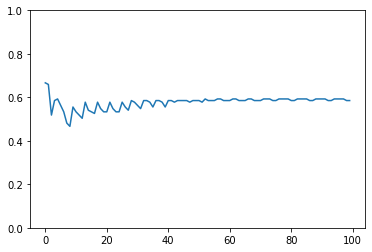

In [15]:
perceptron = Perceptron()
weights , bias = perceptron.fit(X_train,Y_train,100,0.99)

In [16]:
Y_pred_train = perceptron.predict(X_train)
Y_pred_test = perceptron.predict(X_test)
print("Training accuracy is : ",accuracy_score(Y_train,Y_pred_train))
print("Test accuracy is : ",accuracy_score(Y_test,Y_pred_test))

Training accuracy is :  0.6666666666666666
Test accuracy is :  0.6666666666666666


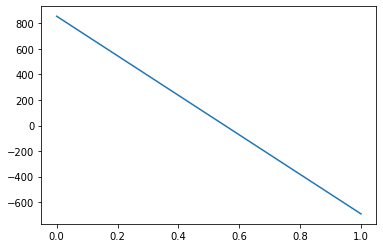

In [17]:
plt.plot(weights[-1,:])
plt.show()

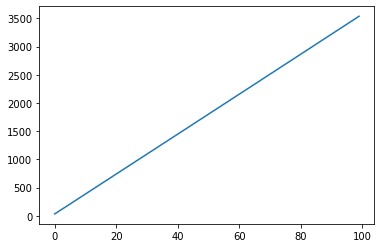

In [18]:
plt.plot(bias)
plt.show()